# Introdução ao Algoritmos KMeans com Python

## Introdução - Aprendizagem não supervisionada

No aprendizado de máquina, nem sempre temos um objetivo de otimizar, nem sempre temos um rótulo de destino para classificar os pontos de dados de entrada. Os tipos de problemas nos quais não temos um objetivo ou rótulo para classificar são denominados problemas de aprendizado não supervisionado no domínio da IA. Em um problema de aprendizado não supervisionado, tentamos modelar as informações estruturadas latentes presentes nos dados. O clustering é um tipo de problema de aprendizado não supervisionado em que tentamos agrupar dados semelhantes com base em sua estrutura subjacente em coortes / clusters. O algoritmo K-means é um famoso algoritmo de agrupamento que é onipresente. K representa o número de clusters nos quais vamos classificar nossos pontos de dados.

## K-Means Pseudocodigo

1. Escolha o número de clusters (K) e obtenha os pontos de dados
2. Coloque os centróides c_1, c_2, ..... c_k aleatoriamente
3. Repita as etapas 4 e 5 até a convergência ou até o final de um número fixo de iterações
4. para cada ponto de dados x_i:
        - encontre o centróide mais próximo (c_1, c_2 .. c_k)
        - atribua o ponto a esse cluster
5. para cada cluster j = 1..k
        - novo centróide = média de todos os pontos atribuídos a esse cluster
6. Fim

As simulações abaixo forneceriam uma melhor compreensão do algoritmo K-means.

![Exemplo de Funcionamento do Algoritmo KMeans](https://cdn-images-1.medium.com/max/750/0*PQa0wLR3drFiJuoh.gif)

![Exemplo de Funcionamento do Algoritmo KMeans](https://cdn-images-1.medium.com/max/750/0*f9HcysjkU6XyM1hb.gif)

## Escolhendo o número certo de clusters

Muitas vezes, os dados com os quais você trabalha têm várias dimensões, dificultando a visualização. Como conseqüência, o número ideal de clusters não é mais óbvio. Felizmente, temos uma maneira de determinar isso matematicamente.
Representamos graficamente a relação entre o número de clusters e a soma dos quadrados dentro do cluster (WCSS); em seguida, selecionamos o número de clusters nos quais a alteração no WCSS começa a se estabilizar (método do cotovelo).

![Elbow Curve](https://cdn-images-1.medium.com/max/1000/1*dChOocbcsLLT1fcxTxj2Ng.png)

WCSS é definido como a soma da distância ao quadrado entre cada membro do cluster e seu centróide.

![Elbow Equation](https://miro.medium.com/max/381/1*bgpKrYZIVBuDirYk0JMnGg.png)

Por exemplo, o WCSS calculado para a figura 1 seria maior que o WCSS calculado para a figura 2.

![Elbow Equation](https://miro.medium.com/max/1404/1*0naSz4RFw_m5VqiRXo2SRw.png)

![Elbow Equation](https://miro.medium.com/max/1924/1*vNsFrDUvGn9yTjlnXLgW8A.png)

Aplicações do algoritmo de agrupamento K-Means
- Segmentação Comportamental
- Detecção de anomalia
- Análise de Redes Sociais
- Segmentação de mercado
Existem apenas alguns exemplos em que o algoritmo de agrupamento como K-means é aplicado.

# Vamso ver na prática

Vamos dar uma olhada em como poderíamos classificar dados usando o algoritmo K-Means com python. Como sempre, precisamos começar importando as bibliotecas necessárias.

In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns

Nesta aula, geraremos nossos próprios dados usando a função make_blobs do módulo sklearn.datasets. O parâmetro centers especifica o número de clusters.

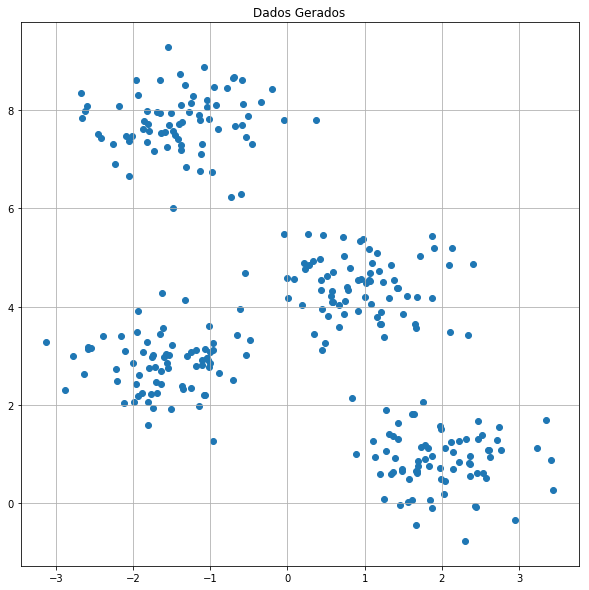

In [73]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1])
plt.title('Dados Gerados')
plt.grid()

Embora já conheçamos o número ideal de clusters, imaginei que ainda poderíamos nos beneficiar da determinação usando o método do cotovelo. Para obter os valores usados no gráfico, treinamos vários modelos usando um número diferente de clusters e armazenamos o valor da propriedade intertia_ (WCSS) sempre.

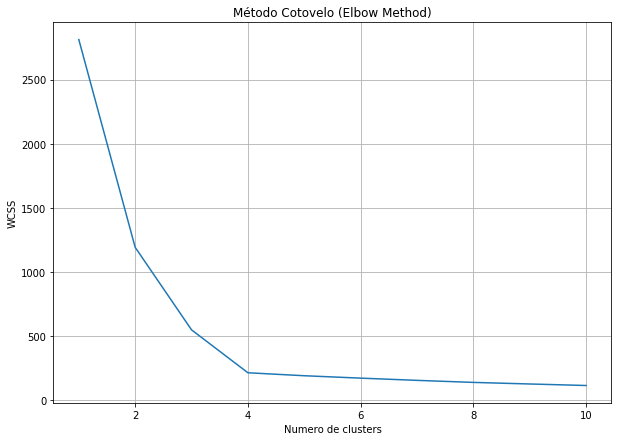

In [74]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(range(1, 11), wcss)
plt.title('Método Cotovelo (Elbow Method)')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

Em seguida, categorizaremos os dados usando o número ideal de clusters (4) que determinamos na última etapa. O k-means ++ garante que você não caia na armadilha de inicialização aleatória.

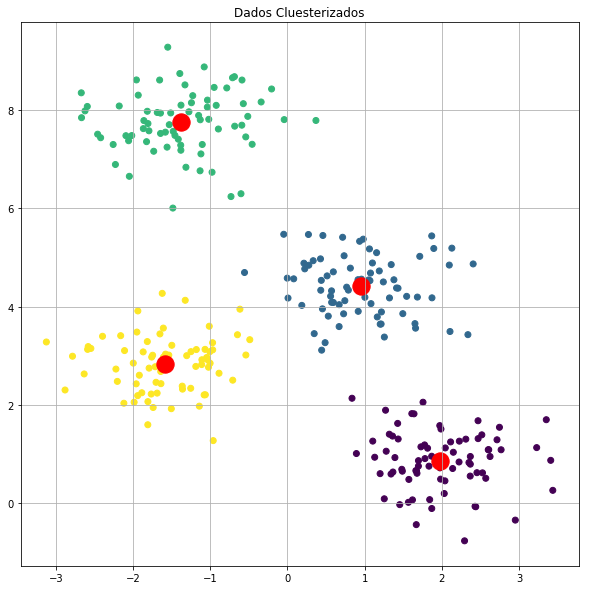

In [75]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c= pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'centroid')
plt.title('Dados Cluesterizados')
plt.grid()
plt.show()

# Um novo dataset

Vamos criar um dataset mais complexo, aumentando o valor de cluster_std

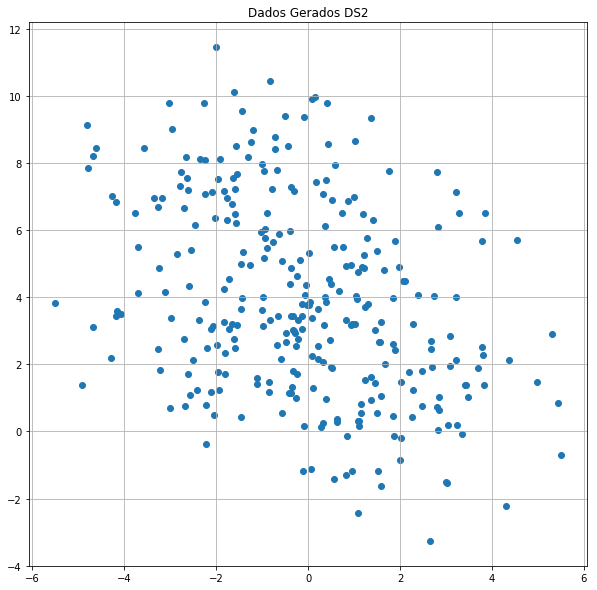

In [76]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=0)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1])
plt.title('Dados Gerados DS2')
plt.grid()

Vamos tentar classificar com 4 clusters e ver o resultado

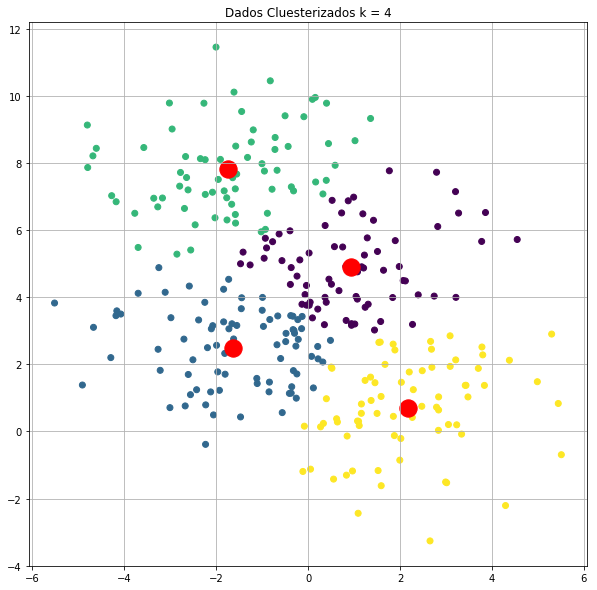

In [77]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c= pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'centroid')
plt.title('Dados Cluesterizados k = 4')
plt.grid()
plt.show()

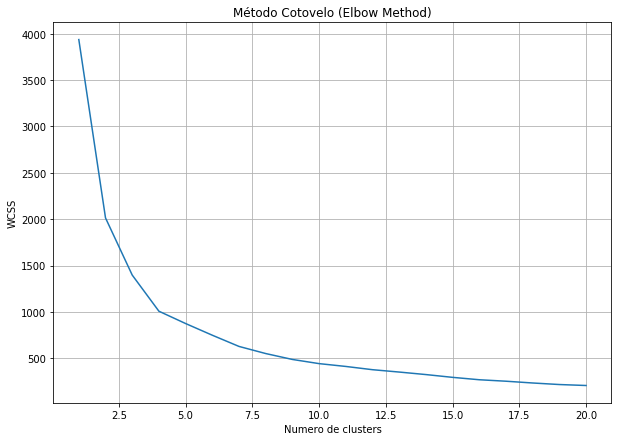

In [78]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=20, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(range(1, 21), wcss)
plt.title('Método Cotovelo (Elbow Method)')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

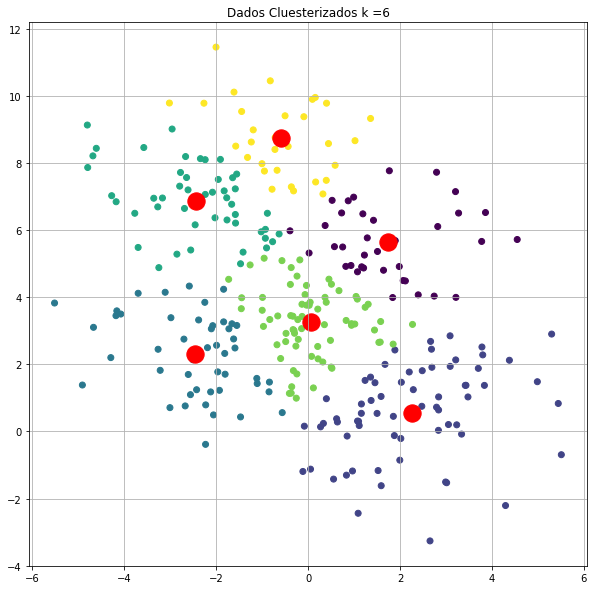

In [79]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c= pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'centroid')
plt.title('Dados Cluesterizados k ='+str(n_clusters))
plt.grid()
plt.show()

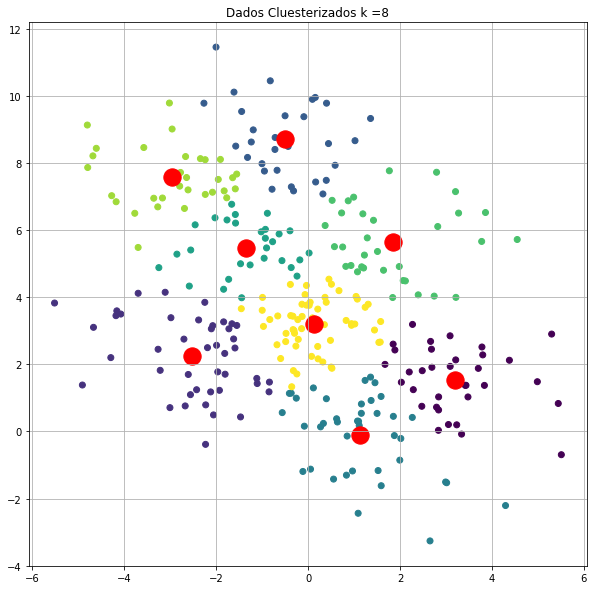

In [80]:
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c= pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'centroid')
plt.title('Dados Cluesterizados k ='+str(n_clusters))
plt.grid()
plt.show()

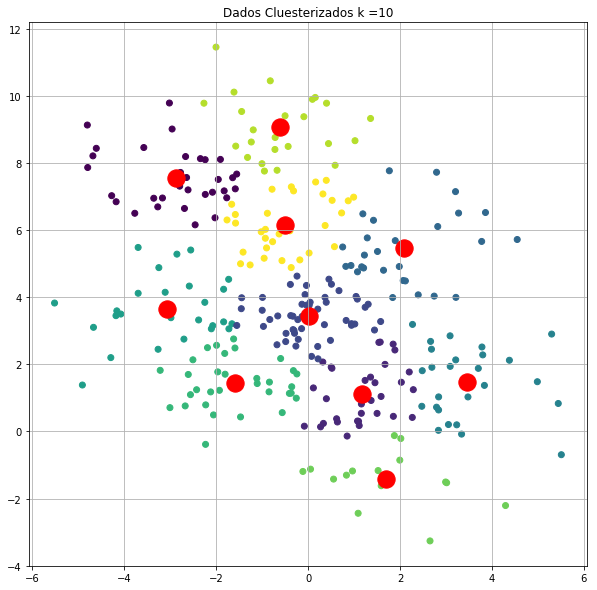

In [81]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c= pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'centroid')
plt.title('Dados Cluesterizados k ='+str(n_clusters))
plt.grid()
plt.show()

### Exemplo 1: k-means em dígitos

Para começar, vamos aplicar as k-médias a base de dados de dígitos .
Aqui, tentaremos usar k-médias para tentar identificar dígitos semelhantes * sem usar as informações originais do rótulo *; isso pode ser semelhante a uma primeira etapa na extração de significado de um novo conjunto de dados sobre o qual você não possui nenhuma informação de rótulo * a priori *.

Começaremos carregando os dígitos e depois localizando os clusters `` KMeans``.
Lembre-se de que os dígitos consistem em 1.797 amostras com 64 recursos, em que cada um dos 64 recursos é o brilho de um pixel em uma imagem 8 × 8:

[O exemplo a seguuir foi traduzido deste link](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

In [82]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

# Vamos conhecer o data set digits

Este conjunto de dados é composto de 1797 imagens 8x8. Cada imagem, como a mostrada abaixo, é de um dígito escrito à mão. Para utilizar uma figura 8x8 como essa, primeiro precisamos transformá-la em um vetor de recurso com comprimento 64.

Veja [aqui](https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits) para mais informações sobre este conjunto de dados.

Automatically created module for IPython interactive environment


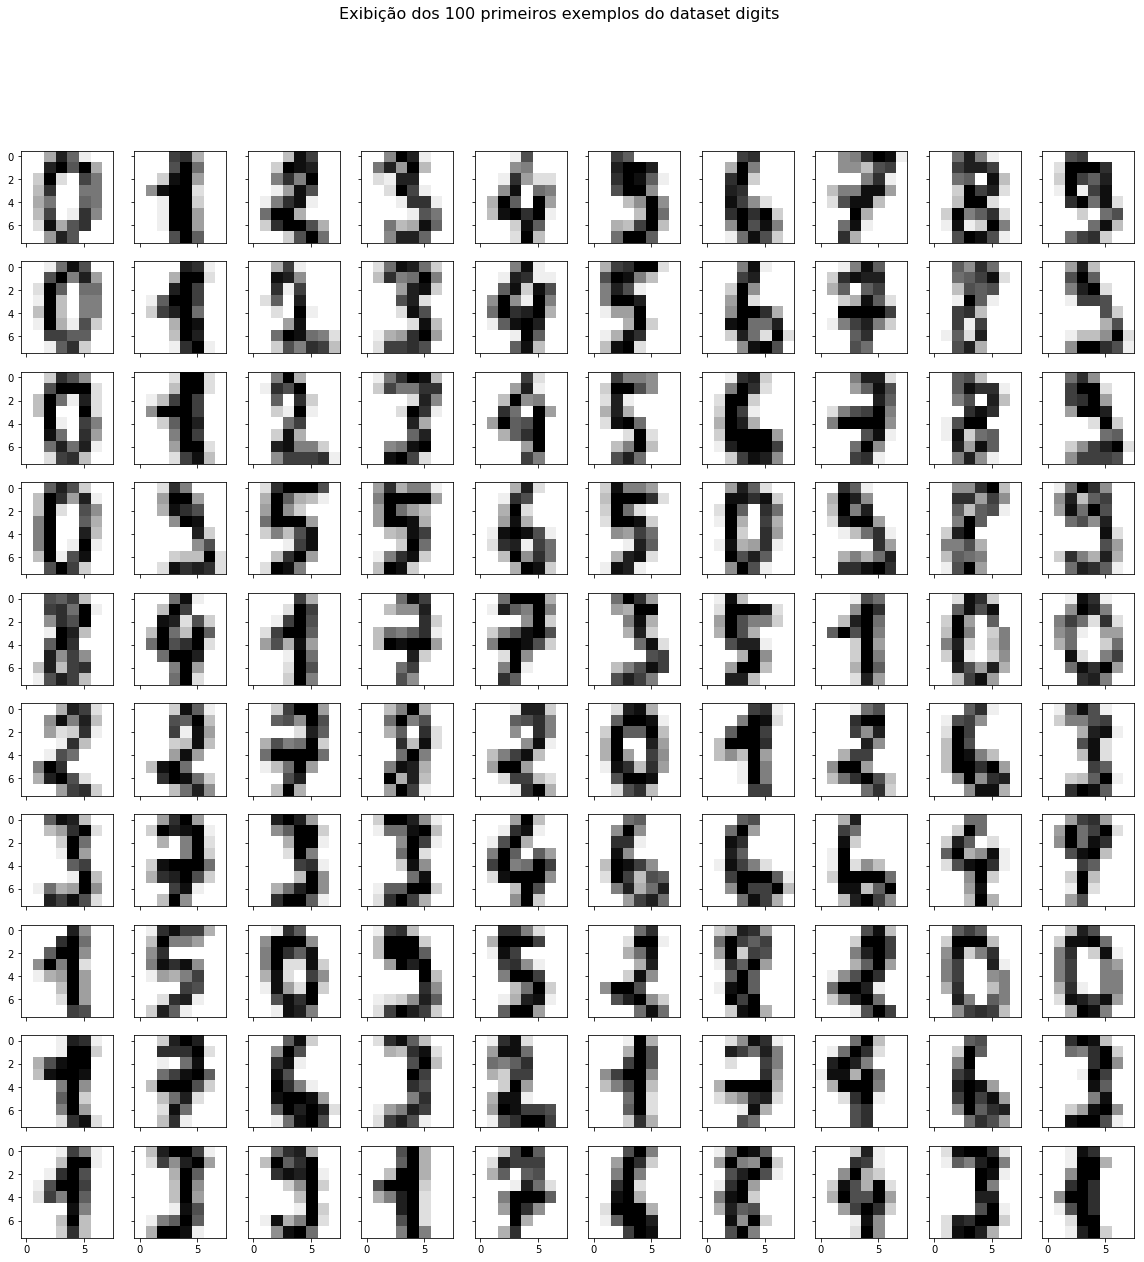

In [85]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from sklearn import datasets

import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
fig, axes = plt.subplots(10, 10, sharex=True, sharey=True, figsize = (20,20))
i=0
fig.suptitle('Exibição dos 100 primeiros exemplos do dataset digits', fontsize=16)
for ax in axes.flat:
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    i+=1
#plt.tight_layout()
plt.show()

## Como é um exemplo de um digito

In [86]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

# Vamos executar a clusterização

In [87]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

O resultado são 10 clusters em 64 dimensões. Observe que os próprios centros do cluster são pontos tridimensionais e podem ser interpretados como o dígito "típico" dentro do cluster. Vamos ver como são esses centros de cluster:

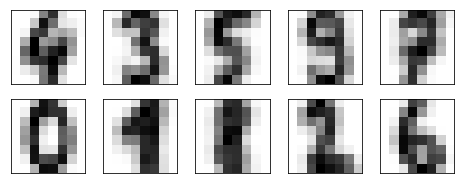

In [88]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Vemos que, mesmo sem os rótulos, o KMeans é capaz de encontrar clusters cujos centros são dígitos reconhecíveis, com talvez a exceção de 1 e 8.

Como o k-means não sabe nada sobre a identidade do cluster, os rótulos de 0 a 9 podem ser permutados. Podemos corrigir isso combinando cada rótulo de cluster aprendido com os rótulos verdadeiros encontrados:

In [89]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Agora podemos verificar a precisão do nosso cluster não supervisionado em encontrar dígitos semelhantes nos dados:

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

Com apenas um algoritmo k-means simples, descobrimos o agrupamento correto para 80% dos dígitos de entrada! Vamos verificar a matriz de confusão para isso:

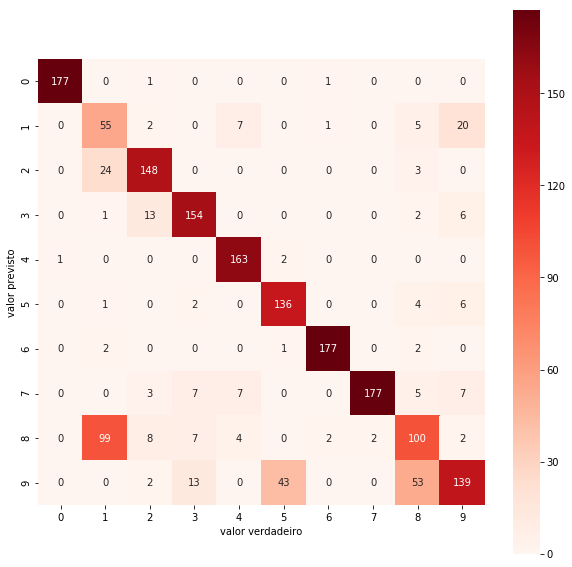

In [92]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
plt.figure(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names,
            cmap = 'Reds')
plt.xlabel('valor verdadeiro')
plt.ylabel('valor previsto');